# Trabajo Final Procesamiento de Imágenes

## Integrantes del grupo:
- Christian Joseph Espíritu Cueva (u201615215)
- Natalia Maury Castañeda (u201816996)
- Sergio Julio Bazan Revollar(u201624050)

## Objetivo:  
Realizar una simulación utilizando los algoritmos aprendidos en clase para demostrar una aplicación de procesamiento de imágenes en la vida diaria

## Introducción:
El trabajo final del curso de procesamiento de imágenes se debe realizar una simulación aplicando todos los conocimientos aprendidos durante el ciclo. Para ello, se realizarán equipos de 3 personas y así lograr el objetivo. Nuestro grupo, decidió realizar una simulación que tiene una aplicación en la medicina, la aplicación realizada logra identificar órganos utilizando los algoritmos aprendidos.

## Algoritmos utilizados y por qué:
- **Método de Otsu/Umbral:** método que permite binarizar una imagen encontrando el punto exacto para convertirla toda en blanco y negro. Esto se utiliza para cambiar la imagen recibida por una binaria, ya que pesa menos y es más fácil realizar las operaciones morfológicas en este tipo de imágen.

- **Filtros de Operaciones Morfológicas:** son filtros que utilizan operaciones  morfológicas que permiten alterar las formas de los objetos para poder reconocer figuras/objetos que se necesitan. Los filtros más importantes son la dilación y la erosión, en ellos se basarán muchos de los filtros morfológicos. Estos filtros se utilizarán para poder aislar los objetos de la imagen, y poder quedarnos sólo con la sección que nos interesa.
  - *Erosión:* operación morfológica que erosiona los elementos blancos de la imagen, ocasionando que incremente el negro y el blanco disminuya. Esto permite contar los objetos en las imágenes ya que los separa.

  - *Dilación:* operación morfológica que dilata los elementos blancos de la imagen, como consecuencia el blanco aumenta y el negro disminuye. 

  - *Bordes:* Es una operación morfológica que utiliza la erosión como su base. Debido a que la erosión puede separar objetos de la imagen, se utiliza en la imágen original para ello y la imagen erosionada se almacena en otro lado. Luego, se resta la imagen original con la erosionada y así se obtienen los bordes ya que una tiene sólo los objetos separados y otra los tiene completos. Por ende, al realizar esta resta se pueden obtener sólo los bordes de las imágenes.

- **Mediana:** Filtro estadístico que permite eliminar el ruido de las imágenes. Las imágenes encontradas tienen algo de ruido, para poder tener mejores resultados al utilizar los filtros de operaciones morfológicas es que se limpiará el ruido de las imágenes con la mediana.

## Procedimiento:
1. Primero, se realizó una operación de Threshold Binario a la imagen de la tomografia donde se precencia el cancer en el higado. Esta tecnica se puede representar de la sigueinte manera.

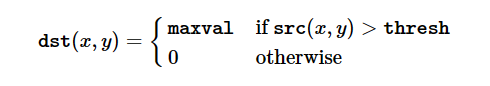
2. Segundo, se realizó otro operación de Treshold Binario para obtener la parte de la imagen que queremos eliminar del primer resultado.
3. Tercero, se realizó una resta de estas dos imagenes obtenidas con la finalidad de poder obtener solo los organos.
4. Cuarto, se cortó la imagen sobrante con una matriz de unos y ceros, con la finalidad de resaltar el organo (higado) objetivo para este trabajo.
5. Finalmete se implementó una interfaz de usuario con la finalidad de poder obtener una imagen especifica del repositorio

# Código

## Funciones para calcular el resultado (Se probaron los elementos con la imagen número 6)

In [ ]:
#Librerías
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from scipy.ndimage.morphology import binary_erosion, binary_dilation
from scipy.ndimage.morphology import binary_fill_holes, morphological_gradient
from scipy.ndimage.morphology import distance_transform_edt
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
for i in range(9):
  base=f'https://raw.githubusercontent.com/ChristianEspirituCueva/TomographyImagesLiver/main/Prueba/IMG-0010-0011{i+1}.dcm.png'
  url = f"{base}"
  !curl -O $url

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  172k  100  172k    0     0  2293k      0 --:--:-- --:--:-- --:--:-- 2324k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  171k  100  171k    0     0  2456k      0 --:--:-- --:--:-- --:--:-- 2456k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  171k  100  171k    0     0  2527k      0 --:--:-- --:--:-- --:--:-- 2527k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  171k  100  171k    0     0  2519k      0 --:--:-- --:--:-- --:--:-- 2519k
  % Total    % Received % Xferd  Average Speed   Tim

In [ ]:
im = rgb2gray(imread('/content/IMG-0010-00115.dcm.png'))
thres = cv2.threshold(im, 127, 255,cv2.THRESH_BINARY_INV)

In [ ]:
#Función mostrar imagen
def show(im, size=8):
  _, ax = plt.subplots(figsize=(size, size))
  ax.imshow(im, interpolation="nearest")
  plt.tight_layout()
  plt.show()

#Función cargar imágen
def loadImg(img):
  im = cv2.imread(img)
  return im[:,:,::-1]

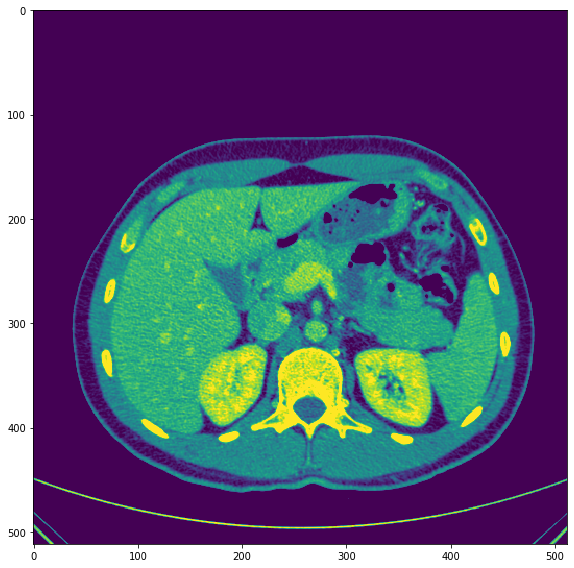

(512, 512)

In [ ]:
im = '/content/IMG-0010-00115.dcm.png'
im = loadImg(im)
im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)
show(im)
im.shape

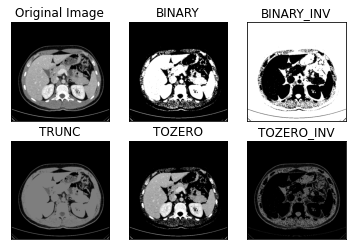

In [ ]:
#Método de Otsu/Umbral:
_, thresh1 = cv2.threshold(im, 126, 255, cv2.THRESH_BINARY)
_, thresh2 = cv2.threshold(im, 126, 255, cv2.THRESH_BINARY_INV)
_, thresh3 = cv2.threshold(im, 126, 255, cv2.THRESH_TRUNC)
_, thresh4 = cv2.threshold(im, 126, 255, cv2.THRESH_TOZERO)
_, thresh5 = cv2.threshold(im, 126, 255, cv2.THRESH_TOZERO_INV)

titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
images = [im, thresh1, thresh2, thresh3, thresh4, thresh5]
for i in range(6):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

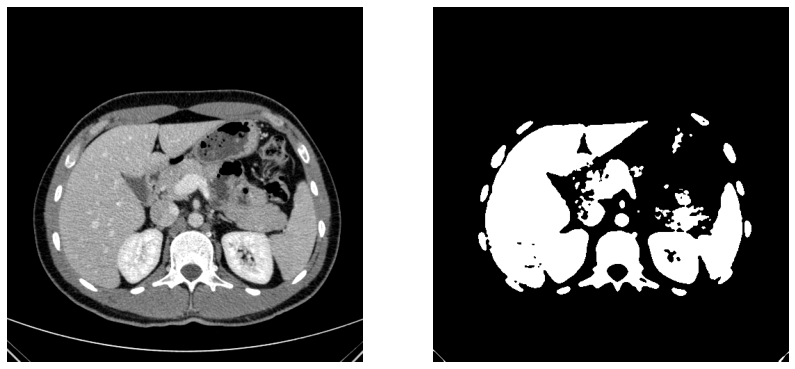

In [ ]:
_, thresh5_1 = cv2.threshold(im, 150, 255, cv2.THRESH_BINARY)
nonoise5_p1=thresh5_1
for i in range(5):
  if i%2 == 0:
    nonoise5_p1 = cv2.medianBlur(nonoise5_p1, i+1)
plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(nonoise5_p1, cmap="gray")
plt.axis("off")
plt.show()

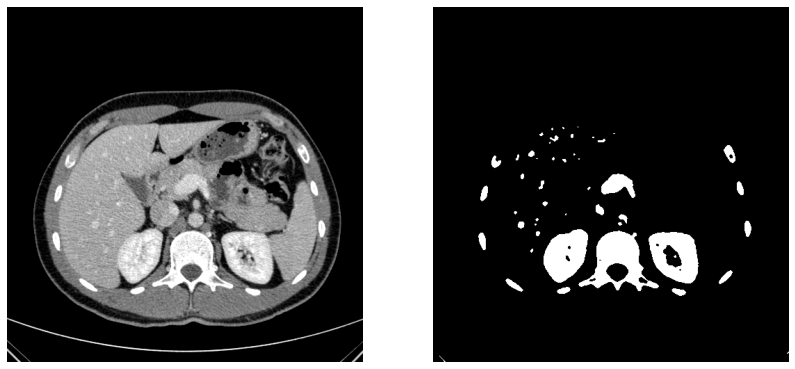

In [ ]:
_, thresh1_p1 = cv2.threshold(im, 185, 255, cv2.THRESH_BINARY)
nonoise_p1=thresh1_p1
for i in range(5):
  if i%2 == 0:
    nonoise_p1 = cv2.medianBlur(nonoise_p1, i+1)

plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(nonoise_p1, cmap="gray")
plt.axis("off")
plt.show()

(-0.5, 511.5, 511.5, -0.5)

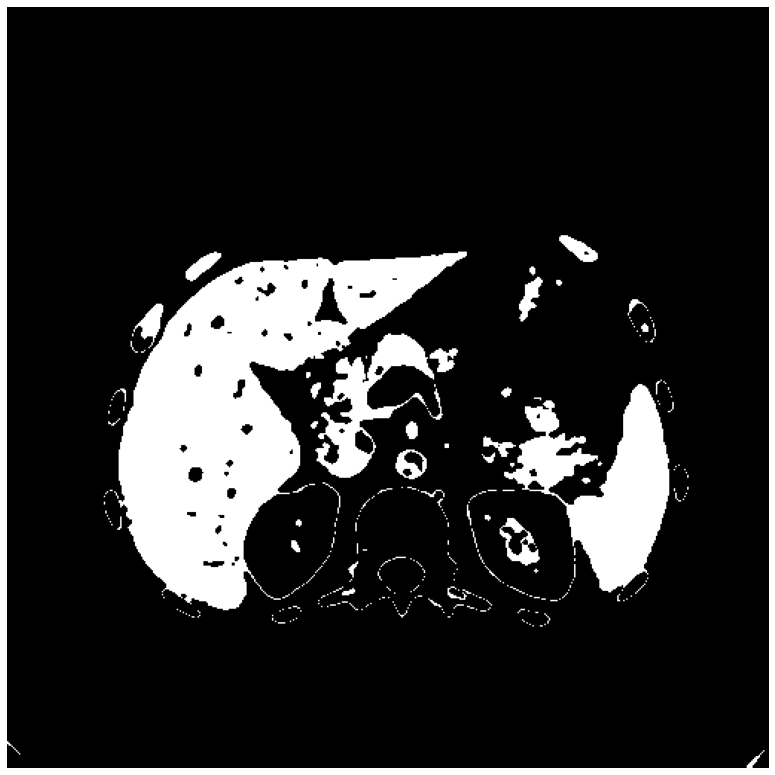

In [ ]:
aux_f_p1 = abs( nonoise5_p1 -nonoise_p1 )
plt.subplots(figsize=(14, 14))
plt.subplot(1, 1, 1)
plt.imshow(aux_f_p1, cmap="gray")
plt.axis("off")

(-0.5, 511.5, 511.5, -0.5)

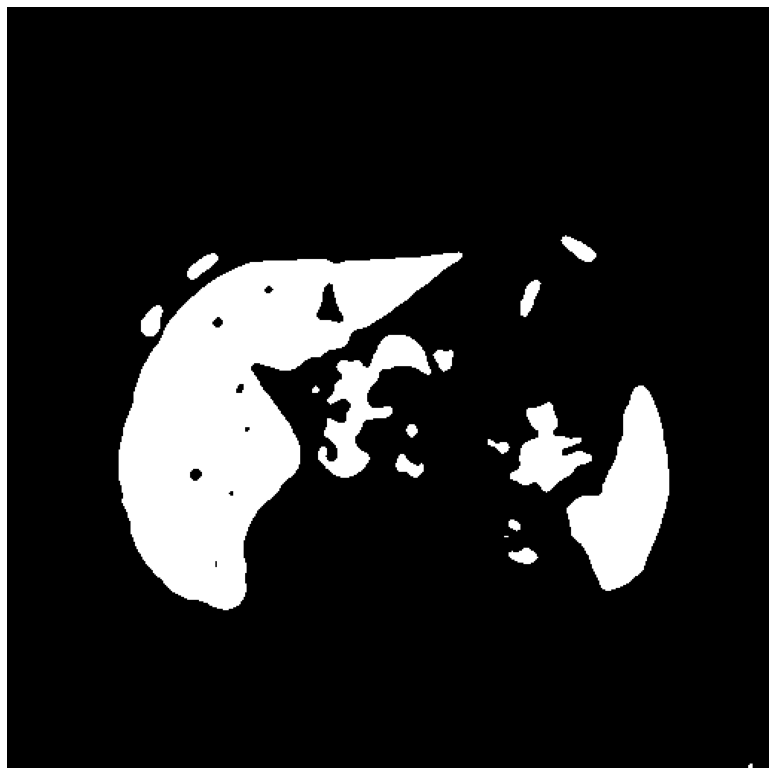

In [ ]:
limpiar_p1=aux_f_p1
for i in range(8):
  if i%2 == 0:
    limpiar_p1 = cv2.medianBlur(limpiar_p1, i+1)
plt.subplots(figsize=(14, 14))
plt.subplot(1, 1, 1)
plt.imshow(limpiar_p1, cmap="gray")
plt.axis("off")

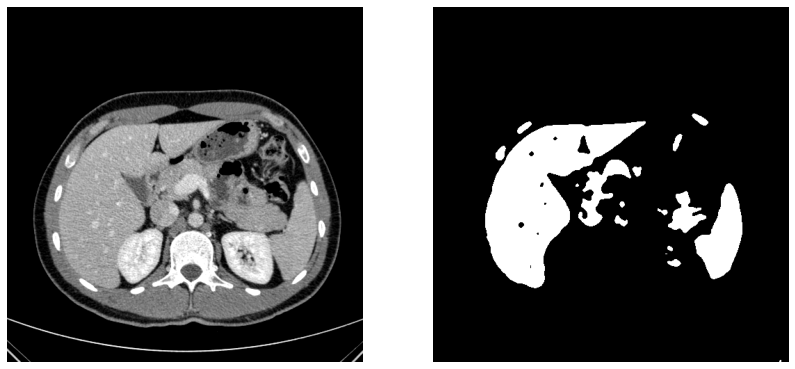

In [ ]:
plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(limpiar_p1, cmap="gray")
plt.axis("off")
plt.show()

(-0.5, 511.5, 511.5, -0.5)

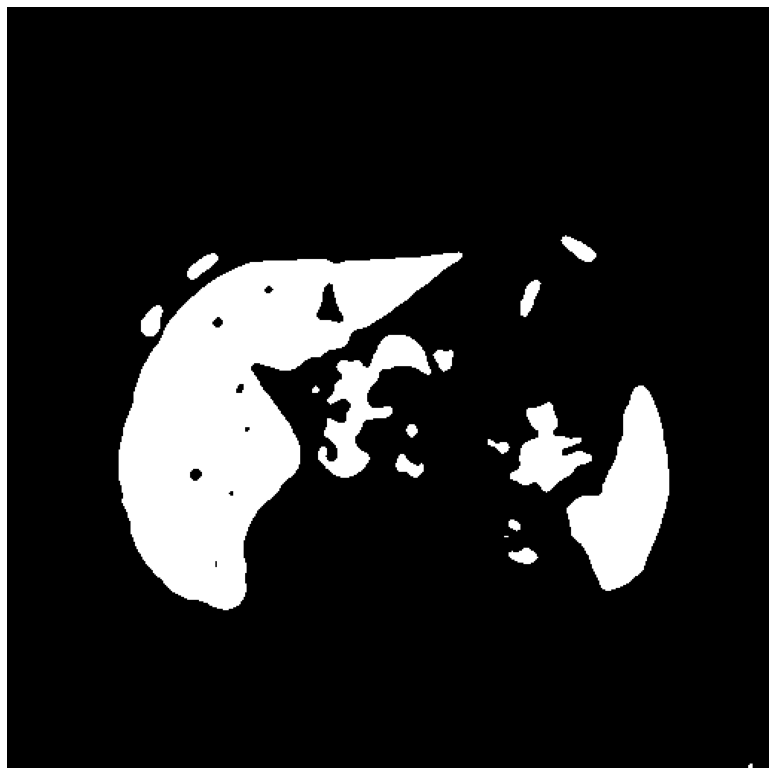

In [ ]:
a=limpiar_p1
auxiliar=a
plt.subplots(figsize=(14, 14))
plt.imshow(auxiliar, cmap="gray")
plt.axis("off")

In [ ]:
#auxiliar=np.ones((im.shape))
for i in range(im.shape[0]):
  for j in range(im.shape[1]):
    if (i >= 180 and i < im.shape[0]) and (j >= im.shape[1]-i+50 and j < im.shape[1] and j>=230):
      auxiliar[i][j]=0

(-0.5, 511.5, 511.5, -0.5)

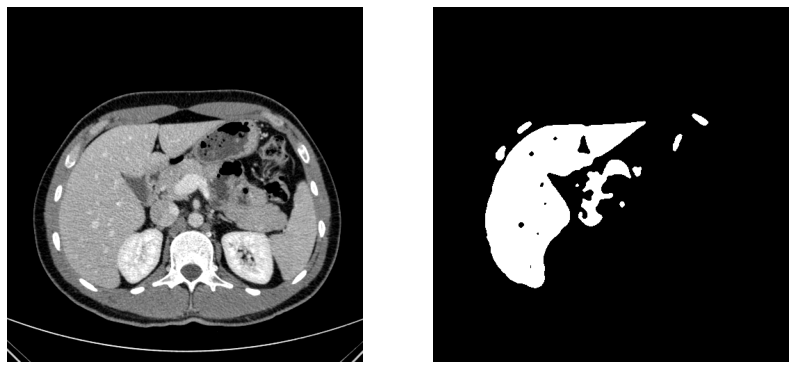

In [ ]:
plt.subplots(figsize=(14, 14))
plt.subplot(1, 2, 1)
plt.imshow(im, cmap="gray")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(auxiliar, cmap="gray")
plt.axis("off")

## Elementos para el menú

In [ ]:
#Arreglo que contiene el nombre de todas las imágenes
imgsArr = ["/content/IMG-0010-00111.dcm.png",
           "/content/IMG-0010-00112.dcm.png",
           "/content/IMG-0010-00113.dcm.png",
           "/content/IMG-0010-00114.dcm.png",
           "/content/IMG-0010-00115.dcm.png",
           "/content/IMG-0010-00116.dcm.png",
           "/content/IMG-0010-00117.dcm.png",
           "/content/IMG-0010-00118.dcm.png",
           "/content/IMG-0010-00119.dcm.png",
           ]

In [ ]:
#Función para rotar la imágen
def rotate_image(image, angle):
  image_center = tuple(np.array(image.shape[1::-1]) / 2)
  rot_mat = cv2.getRotationMatrix2D(image_center, angle, 1.0)
  result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
  return result

In [ ]:
#Función del Menú
def menu():
  print("*********Titulo**********")
  print()
  organo = int(input("Seleccione la imagen que desee procesar(1 - 10): "))
  angulo = int(input("Ingrese el angulo de rotacion(0 - 360): "))
  color = input("De que color desea la image: ")
  resultado(organo, angulo, color)
  return organo, angulo, color

In [ ]:
#Función que se encarga de llamar a todas las funciones para poder calcular y mostrar el resultado
def resultado(organo, angulo, color):
  im = loadImg(imgsArr[organo-1])
  im = cv2.cvtColor(im, cv2.COLOR_RGB2GRAY)

  _, thresh1 = cv2.threshold(im, 126, 255, cv2.THRESH_BINARY)
  _, thresh2 = cv2.threshold(im, 126, 255, cv2.THRESH_BINARY_INV)
  _, thresh3 = cv2.threshold(im, 126, 255, cv2.THRESH_TRUNC)
  _, thresh4 = cv2.threshold(im, 126, 255, cv2.THRESH_TOZERO)
  _, thresh5 = cv2.threshold(im, 126, 255, cv2.THRESH_TOZERO_INV)
  
  titles = ['Original Image','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV']
  images = [im, thresh1, thresh2, thresh3, thresh4, thresh5]
  for i in range(6):
      plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
      plt.title(titles[i])
      plt.xticks([]),plt.yticks([])
  # plt.show()

  _, thresh5_1 = cv2.threshold(im, 150, 255, cv2.THRESH_BINARY)
  nonoise5_p1=thresh5_1
  for i in range(5):
    if i%2 == 0:
      nonoise5_p1 = cv2.medianBlur(nonoise5_p1, i+1)
  # plt.subplots(figsize=(14, 14))
  # plt.subplot(1, 2, 1)
  # plt.imshow(im, cmap="gray")
  # plt.axis("off")
  # plt.subplot(1, 2, 2)
  # plt.imshow(nonoise5_p1, cmap="gray")
  # plt.axis("off")
  # plt.show()
    

  _, thresh1_p1 = cv2.threshold(im, 185, 255, cv2.THRESH_BINARY)
  nonoise_p1=thresh1_p1
  for i in range(5):
    if i%2 == 0:
      nonoise_p1 = cv2.medianBlur(nonoise_p1, i+1)
  # plt.subplots(figsize=(14, 14))
  # plt.subplot(1, 2, 1)
  # plt.imshow(im, cmap="gray")
  # plt.axis("off")
  # plt.subplot(1, 2, 2)
  # plt.imshow(nonoise_p1, cmap="gray")
  # plt.axis("off")
  # plt.show()

  aux_f_p1 = abs( nonoise5_p1 -nonoise_p1 )
  # plt.subplots(figsize=(14, 14))
  # plt.subplot(1, 1, 1)
  # plt.imshow(aux_f_p1, cmap="gray")
  # plt.axis("off")

  limpiar_p1=aux_f_p1
  for i in range(8):
    if i%2 == 0:
      limpiar_p1 = cv2.medianBlur(limpiar_p1, i+1)
  # plt.subplots(figsize=(14, 14))
  # plt.subplot(1, 1, 1)
  # plt.imshow(limpiar_p1, cmap="gray")
  # plt.axis("off")

  a=limpiar_p1
  auxiliar=a
  # plt.subplots(figsize=(14, 14))
  # plt.imshow(auxiliar, cmap="gray")
  # plt.axis("off")

  for i in range(im.shape[0]):
    for j in range(im.shape[1]):
      if (i >= 180 and i < im.shape[0]) and (j >= im.shape[1]-i+50 and j < im.shape[1] and j>=230):
        auxiliar[i][j]=0

  ######## tratar de cambiar color pero no funciona
  backtorgb = cv2.cvtColor(auxiliar,cv2.COLOR_GRAY2RGB)
  lower =(255, 55, 0) # lower bound for each channel
  upper = (255, 255, 10) # upper bound for each channel
# create the mask and use it to change the colors
  mask = cv2.inRange(backtorgb, lower, upper)
  backtorgb[mask != 0] = [0,0,255]
  ####


  rt_img = rotate_image(backtorgb, angulo)

  plt.subplots(figsize=(14, 14))
  plt.subplot(1, 2, 1)
  plt.imshow(im, cmap="gray")
  plt.axis("off")
  plt.subplot(1, 2, 2)
  plt.imshow(rt_img, cmap="gray")
  plt.axis("off")

*********Titulo**********

Seleccione la imagen que desee procesar(1 - 10): 6
Ingrese el angulo de rotacion(0 - 360): 0
De que color desea la image: m


(6, 0, 'm')

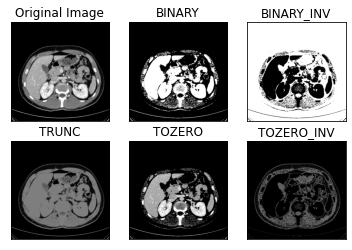

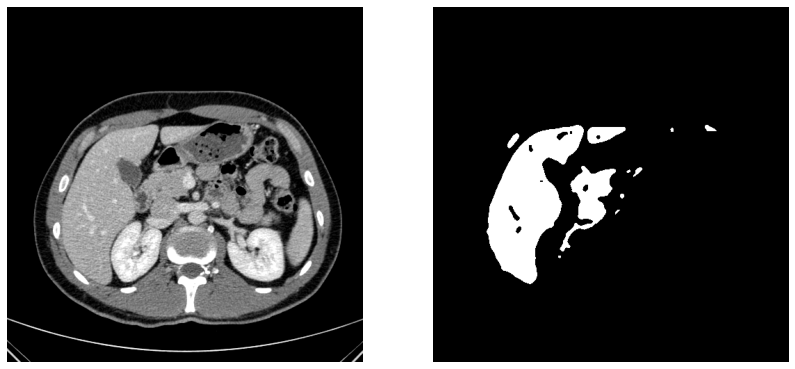

In [ ]:
menu()